# Install and Import Library

In [1]:
#import library
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz
import numpy as np
import matplotlib.pyplot as plt

# Scraping Data

source: 
https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af
https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb

In [2]:
# Creating list to append tweet data to
tweets_list1 = []
today = datetime.today().strftime('%Y-%m-%d')
string = 'pagi from:airaniiofifteen -filter:replies until:'
string = string + today
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string).get_items()):
    tweets_list1.append([tweet.date.astimezone(timezone('Asia/Jakarta')), tweet.date.astimezone(timezone('Asia/Jakarta')).hour, tweet.content])

In [3]:
# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Hour', 'Text'])
tweets_df1[tweets_df1.Text.str.contains("https://t.co")]
tweets_df1[~tweets_df1.Text.str.contains("@")]
# Display first 5 entries from dataframe
tweets_df1[1:20]

,Datetime,Hour,Text
1,2022-05-19 17:23:52+07:00,17,Kalian tau yopi ngapain aja dari pagi sampai j...
2,2022-05-17 09:00:33+07:00,9,Aku yang menikmati teh pagi sambil melihat mem...
3,2022-05-17 08:46:00+07:00,8,Hehehehe\n\nPagi https://t.co/q2nTY5wksP
4,2022-05-16 10:29:08+07:00,10,Pagi 🥰 https://t.co/1pFoyrRaxP
5,2022-05-15 09:16:01+07:00,9,Pagi https://t.co/4LXFwwlOap
6,2022-05-14 09:44:51+07:00,9,Pagi \n\nPat my head pls \n\nなでなでして https://t....
7,2022-05-13 09:50:33+07:00,9,Hmmm\n\nPagi https://t.co/fNsglMlKSu
8,2022-05-12 10:04:17+07:00,10,Pagi 💕 https://t.co/RSGzKIc7DI
9,2022-05-10 10:19:10+07:00,10,Pagi hehehehhe https://t.co/rbrvHzSYnG
10,2022-05-09 09:54:03+07:00,9,Pagi 🥰 https://t.co/wBu9CyviGk


# Count the frequency for each hour

In [4]:
count = tweets_df1['Hour'].value_counts()
count.sort_index()

0       1
4       3
5       1
6       1
8     112
9     266
10     76
11     17
12     10
13      2
14      1
15      2
17      3
18      4
19      4
20      2
21      2
22      4
23      2
Name: Hour, dtype: int64

# Data Visualization

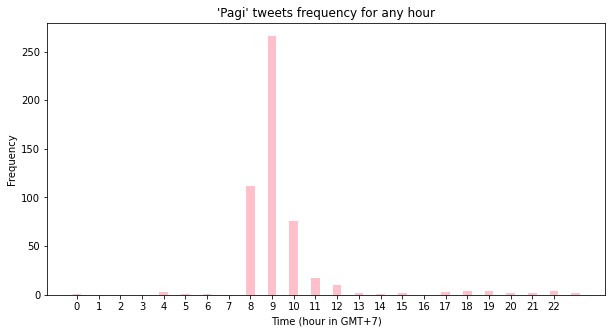

In [5]:
Hours = count.index
Freq = count.values
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Hours, Freq, color ='pink',
        width = 0.4)
plt.xticks(np.arange(0, 23, step=1)) 
plt.xlabel("Time (hour in GMT+7)")
plt.ylabel("Frequency")
plt.title("'Pagi' tweets frequency for any hour")
plt.show()

In [64]:
print(help(plt.xticks))

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this